# Curso planeación de la demanda
Bienvenidos a nuestro primer cuaderno interactivo de python. 

Antes de aprender a utilizar los modelos de pronóstico, vamos a hacer un par de ejercicios de "calentamiento". Por eso, en este cuaderno vamos únicamente a ejecutar las celdas como parte de la demostración.

Los cuadernos son interactivos y cada celda nos permite escribir, ejecutar y visualizar las salidas de bloques de código. 



Primer paso: Importamos los paquetes que vamos a usar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

2. Leer los datos

In [ ]:
aerolinea = pd.read_csv('AirPassengers.csv',index_col='Fecha', parse_dates=True)
aerolinea.head()

,Demanda
Fecha,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
aerolinea.tail(10)

,Demanda
Fecha,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


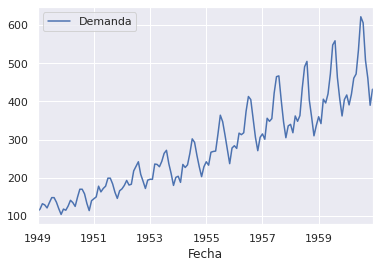

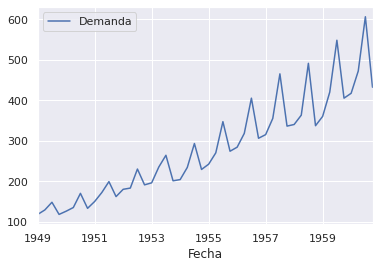

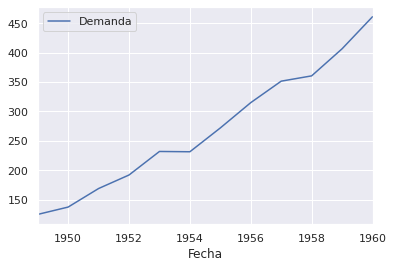

In [ ]:
aerolinea.plot()
aerolinea.resample('Q').median().plot()
aerolinea.resample('Y').median().plot()


### Métodos tradicionales

Holt winters

In [ ]:
alpha = 0.4
beta = 0.6

In [ ]:
# Inicializamos
v1 = aerolinea.reset_index()
v1['St'] = v1['Demanda'].shift(1)
v1['T'] = 0
v1['Ft'] = v1['St'] + v1['T']
v1

,Fecha,Demanda,St,T,Ft
0,1949-01-01,112,NaN,0,NaN
1,1949-02-01,118,112.0,0,112.0
2,1949-03-01,132,118.0,0,118.0
3,1949-04-01,129,132.0,0,132.0
4,1949-05-01,121,129.0,0,129.0
...,...,...,...,...,...
139,1960-08-01,606,622.0,0,622.0
140,1960-09-01,508,606.0,0,606.0
141,1960-10-01,461,508.0,0,508.0
142,1960-11-01,390,461.0,0,461.0


In [ ]:
# Calculamos los parámetros para cada fila
v1['St'] = v1['Demanda'].shift(1)
v1['T'] = 0
v1['Ft'] = v1['St'] + v1['T']
for i in range(len(v1)+2):
  if i > 1 :
    v1.loc[i,'St'] = (alpha*v1.loc[i-1,'Demanda']) + ((1-alpha)*(v1.loc[i-1,'St']+v1.loc[i-1,'T']))
    v1.loc[i,'T'] = beta*(v1.loc[i,'St']-v1.loc[i-1,'St']) + (1-beta)*(v1.loc[i-1,'T'])
    v1.loc[i,'Ft'] = v1.loc[i,'St'] + v1.loc[i,'T']

In [ ]:
v1

,Fecha,Demanda,St,T,Ft
0,1949-01-01,112.0,NaN,0.000000,NaN
1,1949-02-01,118.0,112.000000,0.000000,112.000000
2,1949-03-01,132.0,114.400000,1.440000,115.840000
3,1949-04-01,129.0,122.304000,5.318400,127.622400
4,1949-05-01,121.0,128.173440,5.649024,133.822464
...,...,...,...,...,...
141,1960-10-01,461.0,611.723346,13.685675,625.409021
142,1960-11-01,390.0,559.645412,-25.772490,533.872923
143,1960-12-01,432.0,476.323754,-60.301991,416.021762
144,NaT,NaN,422.413057,-56.467214,365.945843


## Métodos tradicionales
Automatizando el modelo

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Separamos los datos de entrenamiento y de prueba
pasajeros_train = aerolinea[:-10]
pasajeros_test = aerolinea[-10:]

fitted_model = ExponentialSmoothing(pasajeros_train['Demanda'],seasonal_periods=4,trend='mul',seasonal='add').fit()
test_predictions = fitted_model.forecast(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

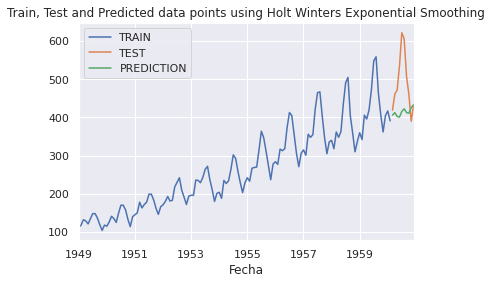

In [ ]:

pasajeros_train['Demanda'].plot(legend=True,label='TRAIN')
pasajeros_test['Demanda'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

Probar con otros parámetros

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


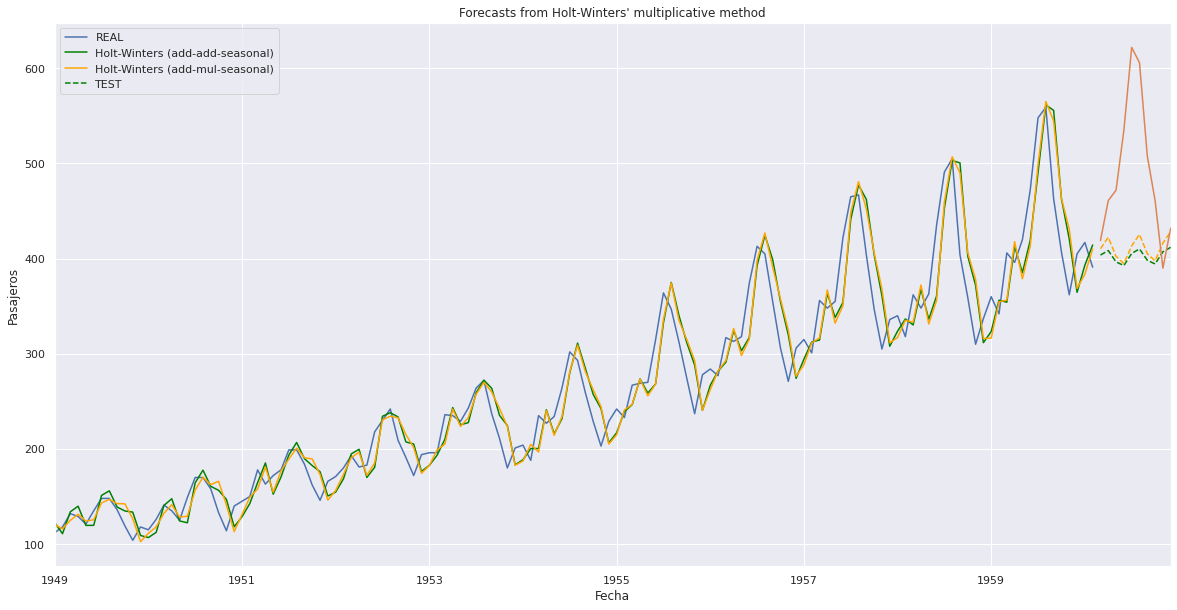

In [ ]:


fit1 = ExponentialSmoothing(
    pasajeros_train['Demanda'],
    seasonal_periods=4,
    trend="add",
    seasonal="add",freq='MS'

).fit()
fit2 = ExponentialSmoothing(
    pasajeros_train['Demanda'],
    seasonal_periods=4,
    trend="add",
    seasonal="mul",freq='MS'

).fit()
fit3 = ExponentialSmoothing(
    pasajeros_train['Demanda'],
    seasonal_periods=4,
    trend="mul",
    seasonal="mul",freq='MS'

).fit()
fit4 = ExponentialSmoothing(
    pasajeros_train['Demanda'],
    seasonal_periods=4,
    trend="mul",
    seasonal="add",freq='MS'
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\gamma$", r"$l_0$", "$b_0$"]
)
#[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
params = [
    "smoothing_level",
    #"smoothing_trend",
    #"damping_trend",
    "smoothing_seasonal",
    "initial_level",
    #"initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = pasajeros_train['Demanda'].plot(
    figsize=(20, 10),
    title="Forecasts from Holt-Winters' multiplicative method",legend=True,label='REAL'
)
ax.set_ylabel("Pasajeros")
ax.set_xlabel("Mes")
fit1.fittedvalues.plot(ax=ax, style="-", color='green')
fit2.fittedvalues.plot(ax=ax, style="-", color='orange')

fit1.forecast(10).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", legend=True, color='green'
)
fit2.forecast(10).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--",  legend=True, color='orange'
)

pasajeros_test['Demanda'].plot(legend=True,label='TEST', ax=ax)
plt.show()



In [ ]:
results

,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,1.000000,0.947368,0.947368,1.000000
$\gamma$,0.000000,0.052632,0.052632,0.000000
$l_0$,259.137941,259.176468,259.176468,259.123408
$b_0$,123515.531965,125419.672888,128592.377581,125526.417362


Comparemos la diferencia entre la realidad y el pronóstico

In [ ]:
pasajeros_test.T - fit1.forecast(10)

Fecha,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
Demanda,15.234551,52.50417,75.405521,142.29167,216.526221,195.795841,109.697191,66.58334,-17.182109,20.087511


### Definimos la métrica

In [29]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(pasajeros_test, fit1.forecast(10))

16.78438857964449

In [ ]:
mean_absolute_percentage_error(pasajeros_test, fit3.forecast(10))

13.72688195965502

## Aprendizaje automático

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#Convirtamos la fecha en dos variables numéricas
p_train = pasajeros_train.reset_index()
p_train['año'] = p_train['Fecha'].dt.year
p_train['mes'] = p_train['Fecha'].dt.month

p_test = pasajeros_test.reset_index()
p_test['año'] = p_test['Fecha'].dt.year
p_test['mes'] = p_test['Fecha'].dt.month

p_train.head()

,Fecha,Demanda,año,mes
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5


La mayoría de modelos tienen una interfaz muy sencilla compuesta por tres pasos:
1. "Invocar" el modelo
2. Entrenar: fit
3. Predecir: predict

In [ ]:
linearreg = LinearRegression()

linearreg.fit(X=p_train.loc[:,['mes','año']], y=p_train.loc[:,'Demanda'])

p_train['pred'] = linearreg.predict(p_train.loc[:,['mes','año']])

p_test['pred'] = linearreg.predict(p_test.loc[:,['mes','año']])

Error porcentual:  12.218346402819472
Error cuadrado:  7379.056427444341


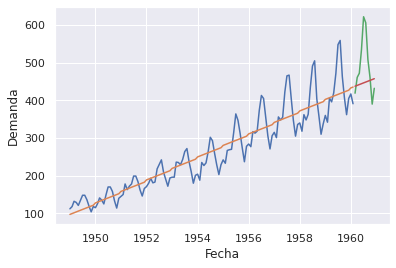

In [ ]:
sns.lineplot(data=p_train, x='Fecha', y='Demanda')
sns.lineplot(data=p_train, x='Fecha', y='pred')
sns.lineplot(data=p_test, x='Fecha', y='Demanda')
sns.lineplot(data=p_test, x='Fecha', y='pred')

print("Error porcentual: ", mean_absolute_percentage_error(p_test['Demanda'], p_test['pred']))
print("Error cuadrado: ", mean_squared_error(p_test['Demanda'], p_test['pred']))

In [ ]:
randf = RandomForestRegressor()

randf.fit(X=p_train.loc[:,['mes','año']], y=p_train.loc[:,'Demanda'])

p_train['rand'] = randf.predict(p_train.loc[:,['mes','año']])

p_test['rand'] = randf.predict(p_test.loc[:,['mes','año']])

Error porcentual:  9.998111986686792
Error cuadrado:  2997.10799


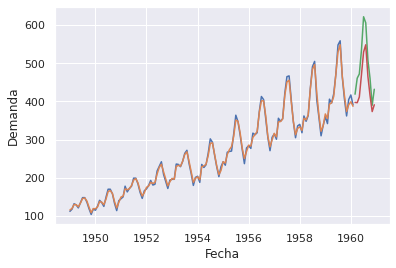

In [ ]:
sns.lineplot(data=p_train, x='Fecha', y='Demanda')
sns.lineplot(data=p_train, x='Fecha', y='rand')
sns.lineplot(data=p_test, x='Fecha', y='Demanda')
sns.lineplot(data=p_test, x='Fecha', y='rand')

print("Error porcentual: ", mean_absolute_percentage_error(p_test['Demanda'], p_test['rand']))
print("Error cuadrado: ", mean_squared_error(p_test['Demanda'], p_test['rand']))

In [1]:
!pip install darts

### Hay personas que continúan desarrollando soluciones para que cada vez sea más fácil pronosticar:
https://unit8.com/resources/darts-time-series-made-easy-in-python/
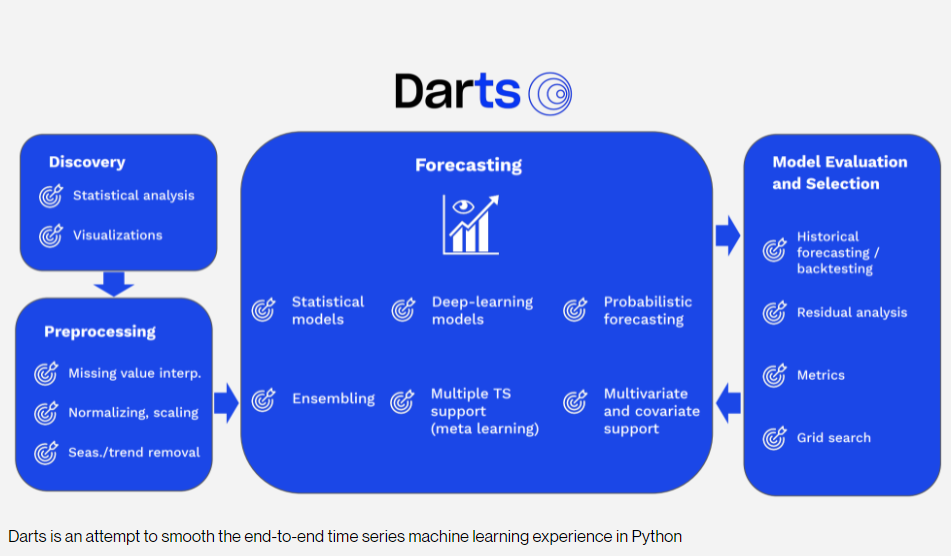

In [19]:
import pandas as pd
from darts import TimeSeries

df = pd.read_csv('AirPassengers.csv')

df = df[20:]
df


,Fecha,Demanda
20,1950-09,158
21,1950-10,133
22,1950-11,114
23,1950-12,140
24,1951-01,145
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [20]:
series = TimeSeries.from_dataframe(df, 'Fecha', 'Demanda')

In [21]:
from darts import models

train, val = series.split_before(pd.Timestamp('19600101'))

model = models.ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

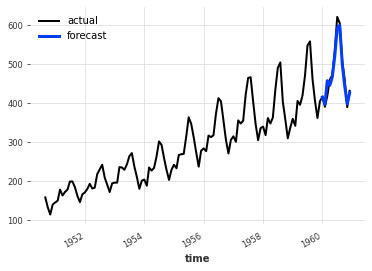

In [22]:
import matplotlib.pyplot as plt
series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [31]:
prediction.pd_series().values

array([415.73383806, 397.44678855, 458.00066969, 445.9945881 ,
       466.96960152, 521.52263111, 593.55063821, 600.36551722,
       500.65400693, 444.36897559, 398.65099707, 426.77045363])

In [32]:
mean_squared_error(val.pd_series().values, prediction.pd_series().values)

272.5149439617515

In [33]:
mean_absolute_percentage_error(val.pd_series().values, prediction.pd_series().values)

2.673864596483361